## Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importing dataset

In [2]:
df=pd.read_csv('Salary_Data.csv')

In [3]:
df.shape

(30, 2)

In [4]:
df.head(2)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


Scatter Plot

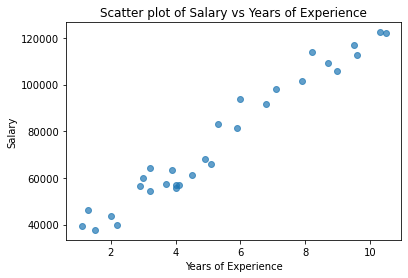

In [8]:
plt.scatter(df['YearsExperience'], df['Salary'], alpha=0.7)
plt.title('Scatter plot of Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

Distribution Plot

Text(0.5, 1.0, 'Distribution Plot')

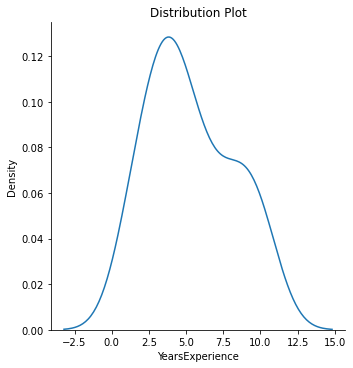

In [9]:
sns.displot(df, x=df['YearsExperience'],kind="kde")
plt.title('Distribution Plot')

In [10]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

In [11]:
type(X)

numpy.ndarray

In [12]:
type(Y)

numpy.ndarray

In [13]:
X.shape

(30, 1)

In [14]:
Y.shape

(30,)

Splitting data into train and test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

Fitting Simple Linear Regression Model to train set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

Parameters in Linear Regression

In [17]:
regressor.coef_

array([9391.75181749])

In [18]:
regressor.intercept_

26329.846420856207

Prediction of Y_test

In [19]:
Y_test_prediction = regressor.predict(X_test)

Prediction of Y_train

In [20]:
Y_train_prediction = regressor.predict(X_train)

In [21]:
Y_test_prediction

array([ 76106.13105358,  61079.32814559,  81741.18214408,  90193.75877982,
       116490.66386881,  63896.85369084,  72349.43032658,  93011.28432507])

In [22]:
Y_train_prediction

array([ 68592.72959958,  63896.85369084,  46991.70041934, 110855.61277831,
        53565.92669159,  40417.4741471 ,  56383.45223684, 100524.68577906,
       124943.24050455, 108038.08723306,  38539.1237836 ,  74227.78069008,
        36660.7734201 , 115551.48868706, 103342.21132431,  54505.10187334,
        62957.67850909,  82680.35732582,  56383.45223684, 123064.89014105,
        64836.02887258,  45113.35005585])

In [23]:
Y_test

array([ 83088.,  57189.,  81363.,  91738., 112635.,  55794.,  67938.,
        98273.])

Visualization of training set

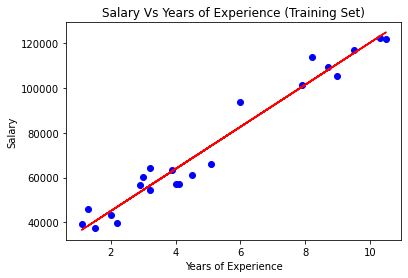

In [24]:
plt.scatter(X_train, Y_train,color ='blue')
plt.plot(X_train,Y_train_prediction,color ='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Vs Years of Experience (Training Set)')
plt.show()

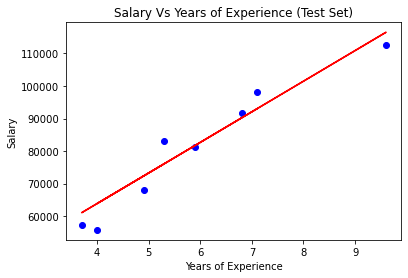

In [25]:
plt.scatter(X_test, Y_test,color ='blue')
plt.plot(X_test,Y_test_prediction,color ='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary Vs Years of Experience (Test Set)')
plt.show()

Test  performance

In [26]:
from sklearn.metrics import mean_squared_error
from numpy import math
math.sqrt(mean_squared_error(Y_test, Y_test_prediction))

4925.413699882687

Train performance

In [27]:
from sklearn.metrics import mean_squared_error
from numpy import math
math.sqrt(mean_squared_error(Y_train, Y_train_prediction))

5824.738441861737

R2 score for train set

In [28]:
from sklearn.metrics import r2_score
r2_score(Y_train, Y_train_prediction)

0.9601501651831542

R2 score for test set

In [29]:
from sklearn.metrics import r2_score
r2_score(Y_test, Y_test_prediction)

0.9304841775581193

import pickle
pickle_out = open("sample.pkl", "wb")
pickle.dump(regressor, pickle_out)
loaded_model = pickle.load(open("sample.pkl", "rb"))
res = loaded_model.score(X_test, Y_test)
print(res)

from joblib import dump, load
dump(regressor, 'file.joblib')

In [32]:
import pickle
filename='model.pkl'
pickle.dump(regressor, open(filename,'wb'))